## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.2ms	remaining: 49.1s
1:	learn: 0.9301086	total: 51.6ms	remaining: 25.7s
2:	learn: 0.9005637	total: 53.8ms	remaining: 17.9s
3:	learn: 0.8720983	total: 56.2ms	remaining: 14s
4:	learn: 0.8467410	total: 58.1ms	remaining: 11.6s
5:	learn: 0.8226672	total: 60.9ms	remaining: 10.1s
6:	learn: 0.7994702	total: 63.2ms	remaining: 8.97s
7:	learn: 0.7784272	total: 66ms	remaining: 8.18s
8:	learn: 0.7602192	total: 68ms	remaining: 7.48s
9:	learn: 0.7412421	total: 70ms	remaining: 6.93s
10:	learn: 0.7247930	total: 72ms	remaining: 6.47s
11:	learn: 0.7089951	total: 74ms	remaining: 6.09s
12:	learn: 0.6951345	total: 76ms	remaining: 5.77s
13:	learn: 0.6809276	total: 78.2ms	remaining: 5.5s
14:	learn: 0.6692630	total: 80.4ms	remaining: 5.28s
15:	learn: 0.6588323	total: 82.4ms	remaining: 5.07s
16:	learn: 0.6472700	total: 84.4ms	remaining: 4.88s
17:	learn: 0.6379982	total: 86.4ms	remaining: 4.71s
18:	learn: 0.6294674	total: 88.4ms	remaining: 4.56s
19:	learn: 0.6193295	total: 90.3ms	re

58:	learn: 0.4840055	total: 167ms	remaining: 2.66s
59:	learn: 0.4824455	total: 169ms	remaining: 2.65s
60:	learn: 0.4809744	total: 171ms	remaining: 2.63s
61:	learn: 0.4801376	total: 173ms	remaining: 2.62s
62:	learn: 0.4792422	total: 175ms	remaining: 2.6s
63:	learn: 0.4780719	total: 177ms	remaining: 2.58s
64:	learn: 0.4771984	total: 179ms	remaining: 2.57s
65:	learn: 0.4759610	total: 181ms	remaining: 2.56s
66:	learn: 0.4750287	total: 182ms	remaining: 2.54s
67:	learn: 0.4740093	total: 184ms	remaining: 2.53s
68:	learn: 0.4732612	total: 186ms	remaining: 2.51s
69:	learn: 0.4727266	total: 188ms	remaining: 2.5s
70:	learn: 0.4716549	total: 190ms	remaining: 2.49s
71:	learn: 0.4709088	total: 192ms	remaining: 2.48s
72:	learn: 0.4697594	total: 195ms	remaining: 2.47s
73:	learn: 0.4690934	total: 197ms	remaining: 2.46s
74:	learn: 0.4680942	total: 198ms	remaining: 2.45s
75:	learn: 0.4672726	total: 200ms	remaining: 2.43s
76:	learn: 0.4664479	total: 202ms	remaining: 2.42s
77:	learn: 0.4656044	total: 204ms

82:	learn: 0.4608838	total: 215ms	remaining: 2.37s
83:	learn: 0.4604376	total: 217ms	remaining: 2.36s
84:	learn: 0.4596603	total: 219ms	remaining: 2.35s
85:	learn: 0.4587835	total: 221ms	remaining: 2.34s
86:	learn: 0.4583577	total: 223ms	remaining: 2.33s
87:	learn: 0.4577999	total: 224ms	remaining: 2.33s
88:	learn: 0.4572657	total: 226ms	remaining: 2.31s
89:	learn: 0.4569360	total: 229ms	remaining: 2.31s
90:	learn: 0.4559969	total: 230ms	remaining: 2.3s
91:	learn: 0.4549716	total: 232ms	remaining: 2.29s
92:	learn: 0.4544919	total: 234ms	remaining: 2.28s
93:	learn: 0.4537693	total: 236ms	remaining: 2.27s
94:	learn: 0.4532673	total: 238ms	remaining: 2.27s
95:	learn: 0.4526987	total: 240ms	remaining: 2.26s
96:	learn: 0.4520952	total: 242ms	remaining: 2.25s
97:	learn: 0.4513919	total: 244ms	remaining: 2.24s
98:	learn: 0.4503747	total: 246ms	remaining: 2.23s
99:	learn: 0.4494783	total: 247ms	remaining: 2.23s
100:	learn: 0.4487329	total: 249ms	remaining: 2.22s
101:	learn: 0.4481325	total: 25

143:	learn: 0.4277528	total: 334ms	remaining: 1.99s
144:	learn: 0.4274087	total: 337ms	remaining: 1.98s
145:	learn: 0.4271984	total: 339ms	remaining: 1.98s
146:	learn: 0.4268458	total: 341ms	remaining: 1.98s
147:	learn: 0.4264987	total: 343ms	remaining: 1.97s
148:	learn: 0.4262192	total: 345ms	remaining: 1.97s
149:	learn: 0.4257966	total: 347ms	remaining: 1.96s
150:	learn: 0.4253062	total: 348ms	remaining: 1.96s
151:	learn: 0.4247446	total: 350ms	remaining: 1.95s
152:	learn: 0.4237365	total: 352ms	remaining: 1.95s
153:	learn: 0.4233079	total: 354ms	remaining: 1.95s
154:	learn: 0.4228876	total: 356ms	remaining: 1.94s
155:	learn: 0.4225404	total: 358ms	remaining: 1.94s
156:	learn: 0.4222831	total: 360ms	remaining: 1.93s
157:	learn: 0.4218088	total: 362ms	remaining: 1.93s
158:	learn: 0.4213239	total: 364ms	remaining: 1.93s
159:	learn: 0.4210022	total: 366ms	remaining: 1.92s
160:	learn: 0.4201256	total: 368ms	remaining: 1.92s
161:	learn: 0.4197073	total: 370ms	remaining: 1.91s
162:	learn: 

167:	learn: 0.4173026	total: 383ms	remaining: 1.9s
168:	learn: 0.4170486	total: 385ms	remaining: 1.89s
169:	learn: 0.4165960	total: 387ms	remaining: 1.89s
170:	learn: 0.4161870	total: 389ms	remaining: 1.88s
171:	learn: 0.4156228	total: 391ms	remaining: 1.88s
172:	learn: 0.4153041	total: 393ms	remaining: 1.88s
173:	learn: 0.4148857	total: 395ms	remaining: 1.87s
174:	learn: 0.4144190	total: 397ms	remaining: 1.87s
175:	learn: 0.4140875	total: 399ms	remaining: 1.87s
176:	learn: 0.4136755	total: 401ms	remaining: 1.86s
177:	learn: 0.4133860	total: 402ms	remaining: 1.86s
178:	learn: 0.4129780	total: 404ms	remaining: 1.85s
179:	learn: 0.4122907	total: 406ms	remaining: 1.85s
180:	learn: 0.4119188	total: 408ms	remaining: 1.85s
181:	learn: 0.4115412	total: 410ms	remaining: 1.84s
182:	learn: 0.4112620	total: 412ms	remaining: 1.84s
183:	learn: 0.4107734	total: 414ms	remaining: 1.84s
184:	learn: 0.4104881	total: 416ms	remaining: 1.83s
185:	learn: 0.4100009	total: 418ms	remaining: 1.83s
186:	learn: 0

226:	learn: 0.3968841	total: 500ms	remaining: 1.7s
227:	learn: 0.3965787	total: 502ms	remaining: 1.7s
228:	learn: 0.3963073	total: 504ms	remaining: 1.7s
229:	learn: 0.3960925	total: 506ms	remaining: 1.69s
230:	learn: 0.3957018	total: 508ms	remaining: 1.69s
231:	learn: 0.3954162	total: 510ms	remaining: 1.69s
232:	learn: 0.3951665	total: 512ms	remaining: 1.69s
233:	learn: 0.3949269	total: 514ms	remaining: 1.68s
234:	learn: 0.3945894	total: 516ms	remaining: 1.68s
235:	learn: 0.3944181	total: 518ms	remaining: 1.68s
236:	learn: 0.3941497	total: 520ms	remaining: 1.67s
237:	learn: 0.3939819	total: 522ms	remaining: 1.67s
238:	learn: 0.3938322	total: 524ms	remaining: 1.67s
239:	learn: 0.3935463	total: 526ms	remaining: 1.67s
240:	learn: 0.3933166	total: 528ms	remaining: 1.66s
241:	learn: 0.3930992	total: 530ms	remaining: 1.66s
242:	learn: 0.3928898	total: 532ms	remaining: 1.66s
243:	learn: 0.3926199	total: 534ms	remaining: 1.65s
244:	learn: 0.3923955	total: 536ms	remaining: 1.65s
245:	learn: 0.3

250:	learn: 0.3908375	total: 547ms	remaining: 1.63s
251:	learn: 0.3904815	total: 550ms	remaining: 1.63s
252:	learn: 0.3902127	total: 552ms	remaining: 1.63s
253:	learn: 0.3900274	total: 554ms	remaining: 1.63s
254:	learn: 0.3898171	total: 556ms	remaining: 1.62s
255:	learn: 0.3896180	total: 558ms	remaining: 1.62s
256:	learn: 0.3894251	total: 560ms	remaining: 1.62s
257:	learn: 0.3892139	total: 562ms	remaining: 1.61s
258:	learn: 0.3889352	total: 564ms	remaining: 1.61s
259:	learn: 0.3886531	total: 566ms	remaining: 1.61s
260:	learn: 0.3884539	total: 567ms	remaining: 1.61s
261:	learn: 0.3882459	total: 569ms	remaining: 1.6s
262:	learn: 0.3881101	total: 571ms	remaining: 1.6s
263:	learn: 0.3879324	total: 573ms	remaining: 1.6s
264:	learn: 0.3876861	total: 575ms	remaining: 1.59s
265:	learn: 0.3874255	total: 577ms	remaining: 1.59s
266:	learn: 0.3868515	total: 579ms	remaining: 1.59s
267:	learn: 0.3866114	total: 581ms	remaining: 1.59s
268:	learn: 0.3863119	total: 583ms	remaining: 1.58s
269:	learn: 0.3

311:	learn: 0.3774323	total: 665ms	remaining: 1.47s
312:	learn: 0.3772732	total: 667ms	remaining: 1.46s
313:	learn: 0.3771184	total: 669ms	remaining: 1.46s
314:	learn: 0.3769370	total: 671ms	remaining: 1.46s
315:	learn: 0.3766643	total: 673ms	remaining: 1.46s
316:	learn: 0.3764891	total: 674ms	remaining: 1.45s
317:	learn: 0.3762751	total: 676ms	remaining: 1.45s
318:	learn: 0.3761284	total: 678ms	remaining: 1.45s
319:	learn: 0.3760168	total: 680ms	remaining: 1.45s
320:	learn: 0.3757763	total: 682ms	remaining: 1.44s
321:	learn: 0.3756076	total: 684ms	remaining: 1.44s
322:	learn: 0.3754123	total: 686ms	remaining: 1.44s
323:	learn: 0.3751852	total: 688ms	remaining: 1.44s
324:	learn: 0.3750004	total: 690ms	remaining: 1.43s
325:	learn: 0.3749086	total: 692ms	remaining: 1.43s
326:	learn: 0.3746654	total: 694ms	remaining: 1.43s
327:	learn: 0.3745405	total: 695ms	remaining: 1.42s
328:	learn: 0.3743710	total: 697ms	remaining: 1.42s
329:	learn: 0.3741679	total: 699ms	remaining: 1.42s
330:	learn: 

335:	learn: 0.3728663	total: 717ms	remaining: 1.42s
336:	learn: 0.3727111	total: 719ms	remaining: 1.41s
337:	learn: 0.3724765	total: 721ms	remaining: 1.41s
338:	learn: 0.3722959	total: 724ms	remaining: 1.41s
339:	learn: 0.3720213	total: 726ms	remaining: 1.41s
340:	learn: 0.3718316	total: 728ms	remaining: 1.41s
341:	learn: 0.3716519	total: 730ms	remaining: 1.41s
342:	learn: 0.3714592	total: 733ms	remaining: 1.4s
343:	learn: 0.3713389	total: 735ms	remaining: 1.4s
344:	learn: 0.3711642	total: 737ms	remaining: 1.4s
345:	learn: 0.3709569	total: 739ms	remaining: 1.4s
346:	learn: 0.3708184	total: 741ms	remaining: 1.39s
347:	learn: 0.3705958	total: 743ms	remaining: 1.39s
348:	learn: 0.3703798	total: 745ms	remaining: 1.39s
349:	learn: 0.3701923	total: 748ms	remaining: 1.39s
350:	learn: 0.3700067	total: 750ms	remaining: 1.39s
351:	learn: 0.3698930	total: 752ms	remaining: 1.38s
352:	learn: 0.3697314	total: 754ms	remaining: 1.38s
353:	learn: 0.3695617	total: 756ms	remaining: 1.38s
354:	learn: 0.36

390:	learn: 0.3637044	total: 831ms	remaining: 1.29s
391:	learn: 0.3636336	total: 833ms	remaining: 1.29s
392:	learn: 0.3635003	total: 835ms	remaining: 1.29s
393:	learn: 0.3633029	total: 837ms	remaining: 1.29s
394:	learn: 0.3632136	total: 839ms	remaining: 1.28s
395:	learn: 0.3629529	total: 841ms	remaining: 1.28s
396:	learn: 0.3627743	total: 843ms	remaining: 1.28s
397:	learn: 0.3626747	total: 844ms	remaining: 1.28s
398:	learn: 0.3625881	total: 846ms	remaining: 1.27s
399:	learn: 0.3622963	total: 848ms	remaining: 1.27s
400:	learn: 0.3622314	total: 850ms	remaining: 1.27s
401:	learn: 0.3620143	total: 852ms	remaining: 1.27s
402:	learn: 0.3618403	total: 854ms	remaining: 1.26s
403:	learn: 0.3616747	total: 856ms	remaining: 1.26s
404:	learn: 0.3614255	total: 858ms	remaining: 1.26s
405:	learn: 0.3613607	total: 860ms	remaining: 1.26s
406:	learn: 0.3612875	total: 862ms	remaining: 1.25s
407:	learn: 0.3611516	total: 864ms	remaining: 1.25s
408:	learn: 0.3609621	total: 866ms	remaining: 1.25s
409:	learn: 

416:	learn: 0.3594487	total: 883ms	remaining: 1.23s
417:	learn: 0.3592759	total: 885ms	remaining: 1.23s
418:	learn: 0.3591088	total: 887ms	remaining: 1.23s
419:	learn: 0.3589470	total: 888ms	remaining: 1.23s
420:	learn: 0.3587972	total: 890ms	remaining: 1.22s
421:	learn: 0.3586831	total: 892ms	remaining: 1.22s
422:	learn: 0.3585620	total: 894ms	remaining: 1.22s
423:	learn: 0.3584427	total: 897ms	remaining: 1.22s
424:	learn: 0.3583044	total: 899ms	remaining: 1.22s
425:	learn: 0.3581698	total: 901ms	remaining: 1.21s
426:	learn: 0.3580461	total: 903ms	remaining: 1.21s
427:	learn: 0.3579182	total: 905ms	remaining: 1.21s
428:	learn: 0.3577521	total: 907ms	remaining: 1.21s
429:	learn: 0.3576138	total: 909ms	remaining: 1.2s
430:	learn: 0.3575528	total: 911ms	remaining: 1.2s
431:	learn: 0.3574686	total: 912ms	remaining: 1.2s
432:	learn: 0.3572923	total: 914ms	remaining: 1.2s
433:	learn: 0.3571859	total: 916ms	remaining: 1.19s
434:	learn: 0.3570185	total: 918ms	remaining: 1.19s
435:	learn: 0.35

473:	learn: 0.3514906	total: 996ms	remaining: 1.1s
474:	learn: 0.3513843	total: 998ms	remaining: 1.1s
475:	learn: 0.3512406	total: 1s	remaining: 1.1s
476:	learn: 0.3510044	total: 1s	remaining: 1.1s
477:	learn: 0.3509121	total: 1s	remaining: 1.1s
478:	learn: 0.3507270	total: 1.01s	remaining: 1.09s
479:	learn: 0.3506003	total: 1.01s	remaining: 1.09s
480:	learn: 0.3505111	total: 1.01s	remaining: 1.09s
481:	learn: 0.3503906	total: 1.01s	remaining: 1.09s
482:	learn: 0.3501522	total: 1.01s	remaining: 1.09s
483:	learn: 0.3500494	total: 1.02s	remaining: 1.08s
484:	learn: 0.3498921	total: 1.02s	remaining: 1.08s
485:	learn: 0.3497143	total: 1.02s	remaining: 1.08s
486:	learn: 0.3496172	total: 1.02s	remaining: 1.08s
487:	learn: 0.3494609	total: 1.02s	remaining: 1.07s
488:	learn: 0.3493200	total: 1.02s	remaining: 1.07s
489:	learn: 0.3491550	total: 1.03s	remaining: 1.07s
490:	learn: 0.3490323	total: 1.03s	remaining: 1.07s
491:	learn: 0.3488767	total: 1.03s	remaining: 1.06s
492:	learn: 0.3487285	tota

499:	learn: 0.3478655	total: 1.05s	remaining: 1.05s
500:	learn: 0.3477966	total: 1.05s	remaining: 1.04s
501:	learn: 0.3476142	total: 1.05s	remaining: 1.04s
502:	learn: 0.3474667	total: 1.05s	remaining: 1.04s
503:	learn: 0.3473844	total: 1.05s	remaining: 1.04s
504:	learn: 0.3471852	total: 1.06s	remaining: 1.03s
505:	learn: 0.3471124	total: 1.06s	remaining: 1.03s
506:	learn: 0.3469987	total: 1.06s	remaining: 1.03s
507:	learn: 0.3469000	total: 1.06s	remaining: 1.03s
508:	learn: 0.3467621	total: 1.06s	remaining: 1.03s
509:	learn: 0.3466653	total: 1.07s	remaining: 1.02s
510:	learn: 0.3465795	total: 1.07s	remaining: 1.02s
511:	learn: 0.3464899	total: 1.07s	remaining: 1.02s
512:	learn: 0.3463711	total: 1.07s	remaining: 1.02s
513:	learn: 0.3462483	total: 1.07s	remaining: 1.01s
514:	learn: 0.3460733	total: 1.07s	remaining: 1.01s
515:	learn: 0.3459427	total: 1.08s	remaining: 1.01s
516:	learn: 0.3458363	total: 1.08s	remaining: 1.01s
517:	learn: 0.3456145	total: 1.08s	remaining: 1.01s
518:	learn: 

557:	learn: 0.3406506	total: 1.16s	remaining: 919ms
558:	learn: 0.3405352	total: 1.16s	remaining: 917ms
559:	learn: 0.3404352	total: 1.16s	remaining: 915ms
560:	learn: 0.3403419	total: 1.17s	remaining: 913ms
561:	learn: 0.3402836	total: 1.17s	remaining: 910ms
562:	learn: 0.3402264	total: 1.17s	remaining: 908ms
563:	learn: 0.3400466	total: 1.17s	remaining: 906ms
564:	learn: 0.3399235	total: 1.17s	remaining: 904ms
565:	learn: 0.3398064	total: 1.18s	remaining: 901ms
566:	learn: 0.3396466	total: 1.18s	remaining: 899ms
567:	learn: 0.3395531	total: 1.18s	remaining: 897ms
568:	learn: 0.3394093	total: 1.18s	remaining: 895ms
569:	learn: 0.3393241	total: 1.18s	remaining: 893ms
570:	learn: 0.3392368	total: 1.19s	remaining: 890ms
571:	learn: 0.3391373	total: 1.19s	remaining: 888ms
572:	learn: 0.3390261	total: 1.19s	remaining: 886ms
573:	learn: 0.3389126	total: 1.19s	remaining: 884ms
574:	learn: 0.3388268	total: 1.19s	remaining: 882ms
575:	learn: 0.3387474	total: 1.19s	remaining: 879ms
576:	learn: 

584:	learn: 0.3378924	total: 1.21s	remaining: 860ms
585:	learn: 0.3378307	total: 1.21s	remaining: 858ms
586:	learn: 0.3377186	total: 1.22s	remaining: 856ms
587:	learn: 0.3376434	total: 1.22s	remaining: 854ms
588:	learn: 0.3375696	total: 1.22s	remaining: 851ms
589:	learn: 0.3374902	total: 1.22s	remaining: 849ms
590:	learn: 0.3373056	total: 1.22s	remaining: 847ms
591:	learn: 0.3371913	total: 1.23s	remaining: 845ms
592:	learn: 0.3371272	total: 1.23s	remaining: 843ms
593:	learn: 0.3370368	total: 1.23s	remaining: 840ms
594:	learn: 0.3368150	total: 1.23s	remaining: 838ms
595:	learn: 0.3367491	total: 1.23s	remaining: 836ms
596:	learn: 0.3366496	total: 1.24s	remaining: 834ms
597:	learn: 0.3365561	total: 1.24s	remaining: 832ms
598:	learn: 0.3364801	total: 1.24s	remaining: 830ms
599:	learn: 0.3363937	total: 1.24s	remaining: 827ms
600:	learn: 0.3363054	total: 1.24s	remaining: 825ms
601:	learn: 0.3361892	total: 1.25s	remaining: 823ms
602:	learn: 0.3360683	total: 1.25s	remaining: 821ms
603:	learn: 

642:	learn: 0.3319978	total: 1.32s	remaining: 736ms
643:	learn: 0.3319044	total: 1.33s	remaining: 734ms
644:	learn: 0.3318169	total: 1.33s	remaining: 732ms
645:	learn: 0.3316585	total: 1.33s	remaining: 730ms
646:	learn: 0.3316256	total: 1.33s	remaining: 728ms
647:	learn: 0.3315220	total: 1.33s	remaining: 726ms
648:	learn: 0.3313829	total: 1.34s	remaining: 723ms
649:	learn: 0.3313125	total: 1.34s	remaining: 721ms
650:	learn: 0.3311735	total: 1.34s	remaining: 719ms
651:	learn: 0.3310386	total: 1.34s	remaining: 717ms
652:	learn: 0.3309129	total: 1.34s	remaining: 715ms
653:	learn: 0.3308321	total: 1.35s	remaining: 713ms
654:	learn: 0.3307342	total: 1.35s	remaining: 711ms
655:	learn: 0.3306809	total: 1.35s	remaining: 709ms
656:	learn: 0.3305729	total: 1.35s	remaining: 707ms
657:	learn: 0.3304900	total: 1.35s	remaining: 704ms
658:	learn: 0.3303842	total: 1.36s	remaining: 702ms
659:	learn: 0.3302235	total: 1.36s	remaining: 700ms
660:	learn: 0.3300983	total: 1.36s	remaining: 698ms
661:	learn: 

668:	learn: 0.3294195	total: 1.38s	remaining: 681ms
669:	learn: 0.3293185	total: 1.38s	remaining: 679ms
670:	learn: 0.3292086	total: 1.38s	remaining: 677ms
671:	learn: 0.3289913	total: 1.38s	remaining: 675ms
672:	learn: 0.3288859	total: 1.39s	remaining: 673ms
673:	learn: 0.3288145	total: 1.39s	remaining: 671ms
674:	learn: 0.3286969	total: 1.39s	remaining: 669ms
675:	learn: 0.3286108	total: 1.39s	remaining: 667ms
676:	learn: 0.3285218	total: 1.39s	remaining: 665ms
677:	learn: 0.3284620	total: 1.39s	remaining: 662ms
678:	learn: 0.3283999	total: 1.4s	remaining: 660ms
679:	learn: 0.3283506	total: 1.4s	remaining: 658ms
680:	learn: 0.3282208	total: 1.4s	remaining: 656ms
681:	learn: 0.3281020	total: 1.4s	remaining: 654ms
682:	learn: 0.3280328	total: 1.4s	remaining: 652ms
683:	learn: 0.3279574	total: 1.41s	remaining: 650ms
684:	learn: 0.3278928	total: 1.41s	remaining: 648ms
685:	learn: 0.3278094	total: 1.41s	remaining: 646ms
686:	learn: 0.3277178	total: 1.41s	remaining: 644ms
687:	learn: 0.327

727:	learn: 0.3240923	total: 1.49s	remaining: 557ms
728:	learn: 0.3240148	total: 1.49s	remaining: 555ms
729:	learn: 0.3239014	total: 1.5s	remaining: 553ms
730:	learn: 0.3237918	total: 1.5s	remaining: 551ms
731:	learn: 0.3236654	total: 1.5s	remaining: 549ms
732:	learn: 0.3235938	total: 1.5s	remaining: 547ms
733:	learn: 0.3235120	total: 1.5s	remaining: 545ms
734:	learn: 0.3234421	total: 1.5s	remaining: 543ms
735:	learn: 0.3233367	total: 1.51s	remaining: 541ms
736:	learn: 0.3232438	total: 1.51s	remaining: 538ms
737:	learn: 0.3231289	total: 1.51s	remaining: 536ms
738:	learn: 0.3230697	total: 1.51s	remaining: 534ms
739:	learn: 0.3229734	total: 1.51s	remaining: 532ms
740:	learn: 0.3228697	total: 1.52s	remaining: 530ms
741:	learn: 0.3227984	total: 1.52s	remaining: 528ms
742:	learn: 0.3226895	total: 1.52s	remaining: 526ms
743:	learn: 0.3225924	total: 1.52s	remaining: 524ms
744:	learn: 0.3225096	total: 1.52s	remaining: 522ms
745:	learn: 0.3224088	total: 1.53s	remaining: 520ms
746:	learn: 0.3223

753:	learn: 0.3218179	total: 1.54s	remaining: 503ms
754:	learn: 0.3217323	total: 1.54s	remaining: 502ms
755:	learn: 0.3216617	total: 1.55s	remaining: 500ms
756:	learn: 0.3216090	total: 1.55s	remaining: 498ms
757:	learn: 0.3215306	total: 1.55s	remaining: 496ms
758:	learn: 0.3214274	total: 1.55s	remaining: 494ms
759:	learn: 0.3212014	total: 1.56s	remaining: 492ms
760:	learn: 0.3211190	total: 1.56s	remaining: 490ms
761:	learn: 0.3210312	total: 1.56s	remaining: 488ms
762:	learn: 0.3209495	total: 1.56s	remaining: 486ms
763:	learn: 0.3208564	total: 1.56s	remaining: 483ms
764:	learn: 0.3207911	total: 1.57s	remaining: 481ms
765:	learn: 0.3206643	total: 1.57s	remaining: 479ms
766:	learn: 0.3205891	total: 1.57s	remaining: 477ms
767:	learn: 0.3204765	total: 1.57s	remaining: 475ms
768:	learn: 0.3203840	total: 1.57s	remaining: 473ms
769:	learn: 0.3203086	total: 1.58s	remaining: 471ms
770:	learn: 0.3202066	total: 1.58s	remaining: 469ms
771:	learn: 0.3200935	total: 1.58s	remaining: 467ms
772:	learn: 

811:	learn: 0.3167047	total: 1.66s	remaining: 384ms
812:	learn: 0.3166132	total: 1.66s	remaining: 382ms
813:	learn: 0.3165391	total: 1.66s	remaining: 380ms
814:	learn: 0.3164726	total: 1.66s	remaining: 378ms
815:	learn: 0.3164087	total: 1.67s	remaining: 376ms
816:	learn: 0.3163590	total: 1.67s	remaining: 374ms
817:	learn: 0.3162644	total: 1.67s	remaining: 372ms
818:	learn: 0.3161739	total: 1.67s	remaining: 370ms
819:	learn: 0.3160986	total: 1.67s	remaining: 368ms
820:	learn: 0.3159951	total: 1.68s	remaining: 366ms
821:	learn: 0.3159403	total: 1.68s	remaining: 363ms
822:	learn: 0.3158160	total: 1.68s	remaining: 361ms
823:	learn: 0.3157523	total: 1.68s	remaining: 359ms
824:	learn: 0.3156673	total: 1.68s	remaining: 357ms
825:	learn: 0.3156288	total: 1.69s	remaining: 355ms
826:	learn: 0.3155257	total: 1.69s	remaining: 353ms
827:	learn: 0.3154546	total: 1.69s	remaining: 351ms
828:	learn: 0.3153664	total: 1.69s	remaining: 349ms
829:	learn: 0.3152896	total: 1.69s	remaining: 347ms
830:	learn: 

837:	learn: 0.3147022	total: 1.71s	remaining: 330ms
838:	learn: 0.3145737	total: 1.71s	remaining: 328ms
839:	learn: 0.3144908	total: 1.71s	remaining: 326ms
840:	learn: 0.3144038	total: 1.71s	remaining: 324ms
841:	learn: 0.3143434	total: 1.72s	remaining: 322ms
842:	learn: 0.3142662	total: 1.72s	remaining: 320ms
843:	learn: 0.3141532	total: 1.72s	remaining: 318ms
844:	learn: 0.3140919	total: 1.72s	remaining: 316ms
845:	learn: 0.3140384	total: 1.72s	remaining: 314ms
846:	learn: 0.3139822	total: 1.73s	remaining: 312ms
847:	learn: 0.3138839	total: 1.73s	remaining: 310ms
848:	learn: 0.3138291	total: 1.73s	remaining: 308ms
849:	learn: 0.3137772	total: 1.73s	remaining: 306ms
850:	learn: 0.3137138	total: 1.73s	remaining: 304ms
851:	learn: 0.3136859	total: 1.74s	remaining: 302ms
852:	learn: 0.3136054	total: 1.74s	remaining: 299ms
853:	learn: 0.3135239	total: 1.74s	remaining: 297ms
854:	learn: 0.3134711	total: 1.74s	remaining: 295ms
855:	learn: 0.3134242	total: 1.74s	remaining: 293ms
856:	learn: 

895:	learn: 0.3103186	total: 1.82s	remaining: 212ms
896:	learn: 0.3102488	total: 1.82s	remaining: 210ms
897:	learn: 0.3101565	total: 1.83s	remaining: 208ms
898:	learn: 0.3100955	total: 1.83s	remaining: 206ms
899:	learn: 0.3100512	total: 1.83s	remaining: 203ms
900:	learn: 0.3100138	total: 1.83s	remaining: 201ms
901:	learn: 0.3099635	total: 1.83s	remaining: 199ms
902:	learn: 0.3098989	total: 1.84s	remaining: 197ms
903:	learn: 0.3098084	total: 1.84s	remaining: 195ms
904:	learn: 0.3097402	total: 1.84s	remaining: 193ms
905:	learn: 0.3096378	total: 1.84s	remaining: 191ms
906:	learn: 0.3095878	total: 1.84s	remaining: 189ms
907:	learn: 0.3095154	total: 1.85s	remaining: 187ms
908:	learn: 0.3094688	total: 1.85s	remaining: 185ms
909:	learn: 0.3093784	total: 1.85s	remaining: 183ms
910:	learn: 0.3093058	total: 1.85s	remaining: 181ms
911:	learn: 0.3092574	total: 1.85s	remaining: 179ms
912:	learn: 0.3092023	total: 1.86s	remaining: 177ms
913:	learn: 0.3091306	total: 1.86s	remaining: 175ms
914:	learn: 

919:	learn: 0.3086793	total: 1.87s	remaining: 163ms
920:	learn: 0.3086255	total: 1.87s	remaining: 161ms
921:	learn: 0.3085073	total: 1.87s	remaining: 159ms
922:	learn: 0.3084388	total: 1.88s	remaining: 156ms
923:	learn: 0.3083752	total: 1.88s	remaining: 154ms
924:	learn: 0.3082889	total: 1.88s	remaining: 152ms
925:	learn: 0.3081901	total: 1.88s	remaining: 150ms
926:	learn: 0.3081106	total: 1.88s	remaining: 148ms
927:	learn: 0.3080422	total: 1.89s	remaining: 146ms
928:	learn: 0.3079770	total: 1.89s	remaining: 144ms
929:	learn: 0.3079316	total: 1.89s	remaining: 142ms
930:	learn: 0.3078660	total: 1.89s	remaining: 140ms
931:	learn: 0.3078147	total: 1.89s	remaining: 138ms
932:	learn: 0.3077165	total: 1.89s	remaining: 136ms
933:	learn: 0.3076207	total: 1.9s	remaining: 134ms
934:	learn: 0.3075333	total: 1.9s	remaining: 132ms
935:	learn: 0.3074829	total: 1.9s	remaining: 130ms
936:	learn: 0.3074088	total: 1.9s	remaining: 128ms
937:	learn: 0.3073356	total: 1.9s	remaining: 126ms
938:	learn: 0.307

980:	learn: 0.3042142	total: 1.99s	remaining: 38.5ms
981:	learn: 0.3041509	total: 1.99s	remaining: 36.5ms
982:	learn: 0.3041077	total: 1.99s	remaining: 34.4ms
983:	learn: 0.3040665	total: 1.99s	remaining: 32.4ms
984:	learn: 0.3040237	total: 2s	remaining: 30.4ms
985:	learn: 0.3039532	total: 2s	remaining: 28.4ms
986:	learn: 0.3038723	total: 2s	remaining: 26.3ms
987:	learn: 0.3038141	total: 2s	remaining: 24.3ms
988:	learn: 0.3037455	total: 2s	remaining: 22.3ms
989:	learn: 0.3036820	total: 2.01s	remaining: 20.3ms
990:	learn: 0.3036165	total: 2.01s	remaining: 18.2ms
991:	learn: 0.3035759	total: 2.01s	remaining: 16.2ms
992:	learn: 0.3035124	total: 2.01s	remaining: 14.2ms
993:	learn: 0.3034295	total: 2.01s	remaining: 12.2ms
994:	learn: 0.3033612	total: 2.02s	remaining: 10.1ms
995:	learn: 0.3033209	total: 2.02s	remaining: 8.1ms
996:	learn: 0.3032659	total: 2.02s	remaining: 6.08ms
997:	learn: 0.3032189	total: 2.02s	remaining: 4.05ms
998:	learn: 0.3031594	total: 2.02s	remaining: 2.02ms
999:	lear

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10266600520611555


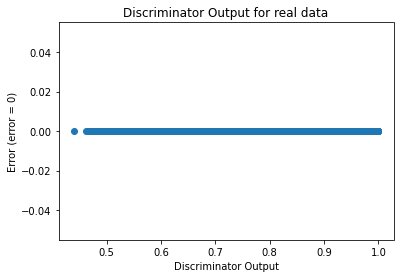

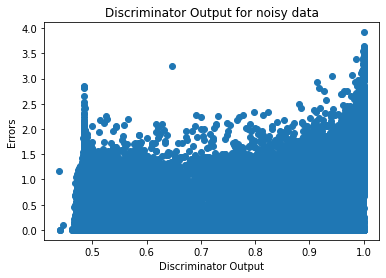

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
